<a href="https://colab.research.google.com/github/lacinboz/car-price-prediction-python/blob/main/Home_assignment_Linear_regression_knn_LacinBoz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#from google.colab import files
#uploaded = files.upload()

#https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
#/content/CarPrice_Assignment.csv
#I wrote this code from Jupiter Notebook and transferred it here.
#It reads the data
df = pd.read_csv('/content/CarPrice_Assignment.csv')
# I checked the first 3 lines to see if the data was loaded.
df.head(3)
# I checked for the inital row and column numbers
df.shape

(205, 26)

In [ ]:
#To make categorical variables numerical, I looked at the independent variables one by one and used label encoding for those with 2 options, and one-hot encoding for those with more options.
#It sets the gas and diesel options in the Fueltype column to 1 and 0, thus becoming a numerical variable.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df['fueltype'].unique().tolist()


['gas', 'diesel']

In [ ]:
df['aspiration'].unique().tolist()

['std', 'turbo']

In [ ]:
df['doornumber'].unique().tolist()

['two', 'four']

In [ ]:
df['enginelocation'].unique().tolist()

['front', 'rear']

In [ ]:
#To make categorical variables numerical, I looked at the independent variables one by one and used label encoding for those with 2 options, and one-hot encoding for those with more options.
#It sets the gas and diesel options in the Fueltype column to 1 and 0, thus becoming a numerical variable.

df['fueltype'] = df['fueltype'].map({'gas': 0, 'diesel': 1})
#I did the same things for aspiration, doornumber and enginelocation so that those with 2 options would be numeric more efficiently (compared to one-hot encoding).
df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})
df['enginelocation'] = df['enginelocation'].map({'front': 0, 'rear': 1})

In [ ]:
# Now these 4 have numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Since I had to make the categorical variables numeric, I checked what type the initial values were and started making the independent variables of object type numeric.
#Since there were so many variables, I sometimes printed categorical features throughout the code to see them better.
categorical_features = df.dtypes == object
list_categorical_features = df.columns[categorical_features].tolist()
df[list_categorical_features]


,CarName,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,convertible,rwd,dohc,four,mpfi
1,alfa-romero stelvio,convertible,rwd,dohc,four,mpfi
2,alfa-romero Quadrifoglio,hatchback,rwd,ohcv,six,mpfi
3,audi 100 ls,sedan,fwd,ohc,four,mpfi
4,audi 100ls,sedan,4wd,ohc,five,mpfi
...,...,...,...,...,...,...
200,volvo 145e (sw),sedan,rwd,ohc,four,mpfi
201,volvo 144ea,sedan,rwd,ohc,four,mpfi
202,volvo 244dl,sedan,rwd,ohcv,six,mpfi
203,volvo 246,sedan,rwd,ohc,six,idi


In [ ]:
#Since most of the car names in the data set were written together with their model,I had to collect them under one brand, so I separated the words and took the first word.
#I applied the same thing to each column of the DataFrame with the apply function.
def get_company_name(name):
    return name.split()[0]

df['CompanyName'] = df['CarName'].apply(get_company_name)


In [ ]:
df['CompanyName'].unique().tolist()


['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'buick',
 'mercury',
 'mitsubishi',
 'Nissan',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'porcshce',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'vokswagen',
 'volkswagen',
 'vw',
 'volvo']

In [ ]:
# Some car brands were written incorrectly so I corrected them. And to see this, I printed the unique values.I showed each of the car brands whose model names were deleted.
df["CompanyName"].replace("alfa-romero","alfa-romeo", inplace=True)
df["CompanyName"].replace("maxda","mazda", inplace=True)
df["CompanyName"].replace("Nissan","nissan", inplace=True)
df["CompanyName"].replace("porcshce","porsche", inplace=True)
df["CompanyName"].replace("toyouta","toyota", inplace=True)
df["CompanyName"].replace("porcshce","porsche", inplace=True)
df["CompanyName"].replace("vokswagen","volkswagen", inplace=True)
df["CompanyName"].replace("vw","volkswagen", inplace=True)
df['CompanyName'].unique().tolist()
#Since I wanted to preserve the original data, I assigned it to the new variable.
df2=df.copy()
df2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,0,0,2,convertible,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,2,3,alfa-romero stelvio,0,0,2,convertible,rwd,0,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,3,1,alfa-romero Quadrifoglio,0,0,2,hatchback,rwd,0,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,4,2,audi 100 ls,0,0,4,sedan,fwd,0,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,0,0,4,sedan,4wd,0,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
df2['carbody'].unique().tolist()


['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']

In [ ]:
df2['enginetype'].unique().tolist()


['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [ ]:
df2['CompanyName'].unique().tolist()


['alfa-romeo',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'buick',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [ ]:
#That was not important
df2['fuelsystem'].unique().tolist()


['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']

In [ ]:
df2['enginetype'].unique().tolist()

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [ ]:
# It converts categorical columns with one-hot encoding (because it has a lot of values)
dummies = pd.get_dummies(df2[['enginetype','CompanyName','cylindernumber','carbody']])

# It combines the original DataFrame with the columns converted with one-hot encoding. The axis=1 parameter specifies that the merge will be done on a column-by-column basis.
df3 = pd.concat([df2, dummies], axis=1)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    int64  
 4   aspiration              205 non-null    int64  
 5   doornumber              205 non-null    int64  
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    int64  
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

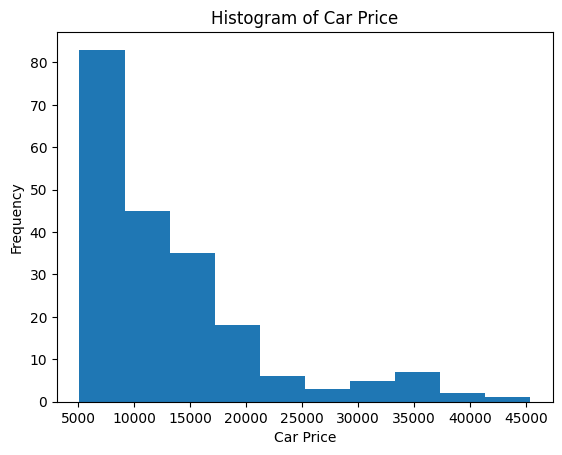

In [ ]:
#Distribution of Target Variable
plt.hist(df3['price'])
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Price')
plt.show()

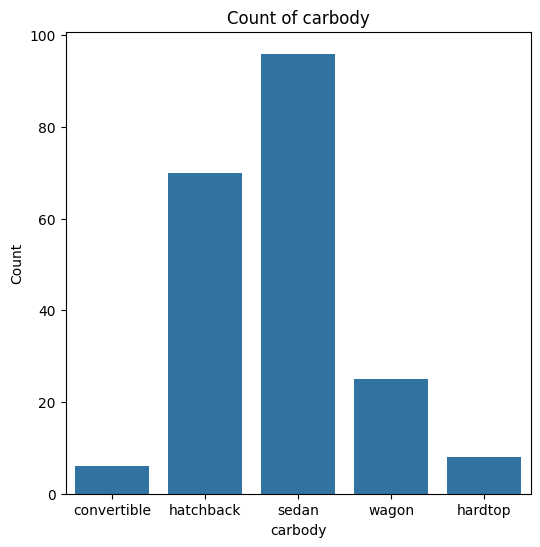

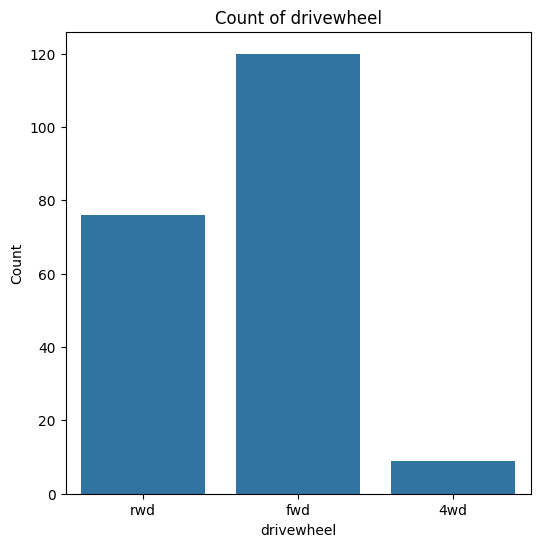

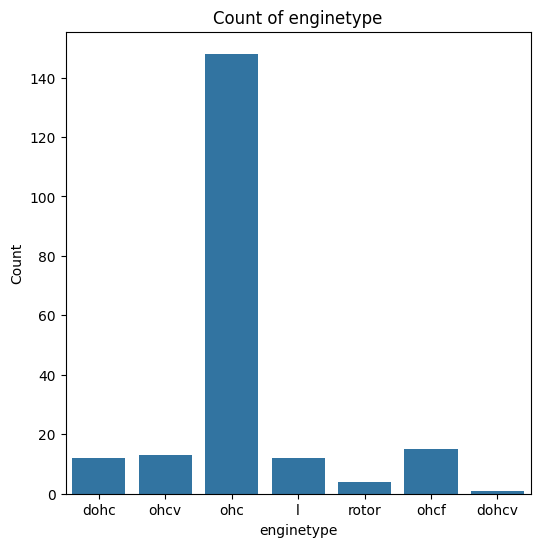

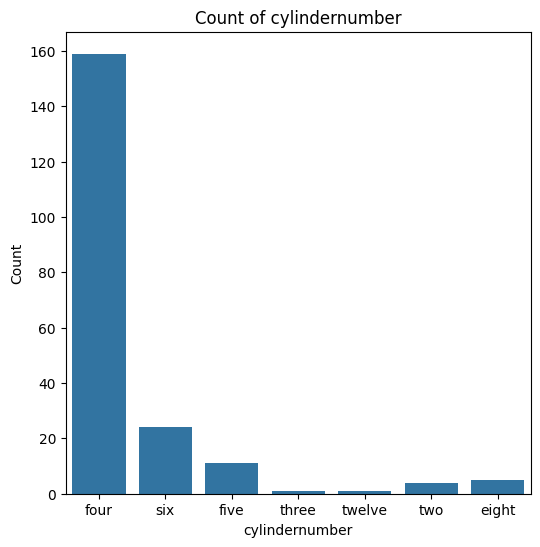

In [ ]:
df3.drop(columns=['CarName','CompanyName','fuelsystem'],inplace=True)

# Sadece kategorik değişkenlerin seçilmesi
categorical_columns = df3.select_dtypes(include=['object']).columns

# Her bir kategorik değişken için frekansların görselleştirilmesi
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()




In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   fueltype                205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   doornumber              205 non-null    int64  
 5   carbody                 205 non-null    object 
 6   drivewheel              205 non-null    object 
 7   enginelocation          205 non-null    int64  
 8   wheelbase               205 non-null    float64
 9   carlength               205 non-null    float64
 10  carwidth                205 non-null    float64
 11  carheight               205 non-null    float64
 12  curbweight              205 non-null    int64  
 13  enginetype              205 non-null    object 
 14  cylindernumber          205 non-null    ob

In [ ]:
#Drop some columns to reduce complexity (also after one-hot encoding, I removed unused columns.)
df3.drop(columns=['cylindernumber','drivewheel'],inplace=True)
df3.drop(columns=['carbody','enginetype'],inplace=True)
df3

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,0,0,2,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,True,False,False,False,False
1,2,3,0,0,2,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,True,False,False,False,False
2,3,1,0,0,2,0,94.5,171.2,65.5,52.4,...,False,True,False,False,False,False,False,True,False,False
3,4,2,0,0,4,0,99.8,176.6,66.2,54.3,...,True,False,False,False,False,False,False,False,True,False
4,5,2,0,0,4,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,4,0,109.1,188.8,68.9,55.5,...,True,False,False,False,False,False,False,False,True,False
201,202,-1,0,1,4,0,109.1,188.8,68.8,55.5,...,True,False,False,False,False,False,False,False,True,False
202,203,-1,0,0,4,0,109.1,188.8,68.9,55.5,...,False,True,False,False,False,False,False,False,True,False
203,204,-1,1,1,4,0,109.1,188.8,68.9,55.5,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
#It calculates the correlation matrix, takes the correlation coefficients between the "price" column and all other variables,
#and sorts them by their absolute values. Shows the top 10 variables with the highest correlation.
#The closer it gets to 1, the greater the relationship.
#Features with high correlation coefficients generally have a strong linear relationship with the target variable.

df4 = df3.copy()

correlation_matrix = df4.corr()

price_correlations = correlation_matrix['price'].drop('price')

price_correlations_sorted = price_correlations.abs().sort_values(ascending=False)

print(price_correlations_sorted.head(10))

enginesize             0.874145
curbweight             0.835305
horsepower             0.808139
carwidth               0.759325
cylindernumber_four    0.697762
highwaympg             0.697599
citympg                0.685751
carlength              0.682920
wheelbase              0.577816
boreratio              0.553173
Name: price, dtype: float64


In [ ]:
#There were no other categorical variables left.
categorical_features1 = df3.dtypes==object
list_categorical_features1 = df3.columns[categorical_features1].tolist()
list_categorical_features1

[]

In [ ]:
df3.info()
df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   fueltype                205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   doornumber              205 non-null    int64  
 5   enginelocation          205 non-null    int64  
 6   wheelbase               205 non-null    float64
 7   carlength               205 non-null    float64
 8   carwidth                205 non-null    float64
 9   carheight               205 non-null    float64
 10  curbweight              205 non-null    int64  
 11  enginesize              205 non-null    int64  
 12  boreratio               205 non-null    float64
 13  stroke                  205 non-null    float64
 14  compressionratio        205 non-null    fl

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon
0,1,3,0,0,2,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,True,False,False,False,False
1,2,3,0,0,2,0,88.6,168.8,64.1,48.8,...,True,False,False,False,False,True,False,False,False,False
2,3,1,0,0,2,0,94.5,171.2,65.5,52.4,...,False,True,False,False,False,False,False,True,False,False
3,4,2,0,0,4,0,99.8,176.6,66.2,54.3,...,True,False,False,False,False,False,False,False,True,False
4,5,2,0,0,4,0,99.4,176.6,66.4,54.3,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,0,0,4,0,109.1,188.8,68.9,55.5,...,True,False,False,False,False,False,False,False,True,False
201,202,-1,0,1,4,0,109.1,188.8,68.8,55.5,...,True,False,False,False,False,False,False,False,True,False
202,203,-1,0,0,4,0,109.1,188.8,68.9,55.5,...,False,True,False,False,False,False,False,False,True,False
203,204,-1,1,1,4,0,109.1,188.8,68.9,55.5,...,False,True,False,False,False,False,False,False,True,False


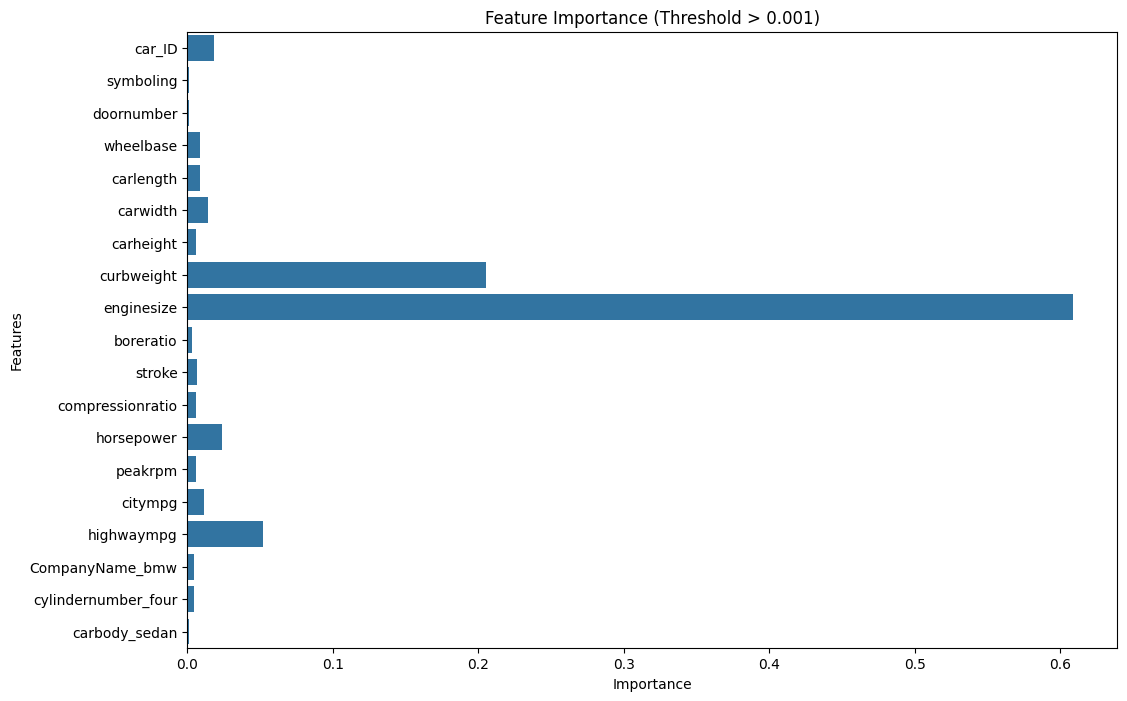

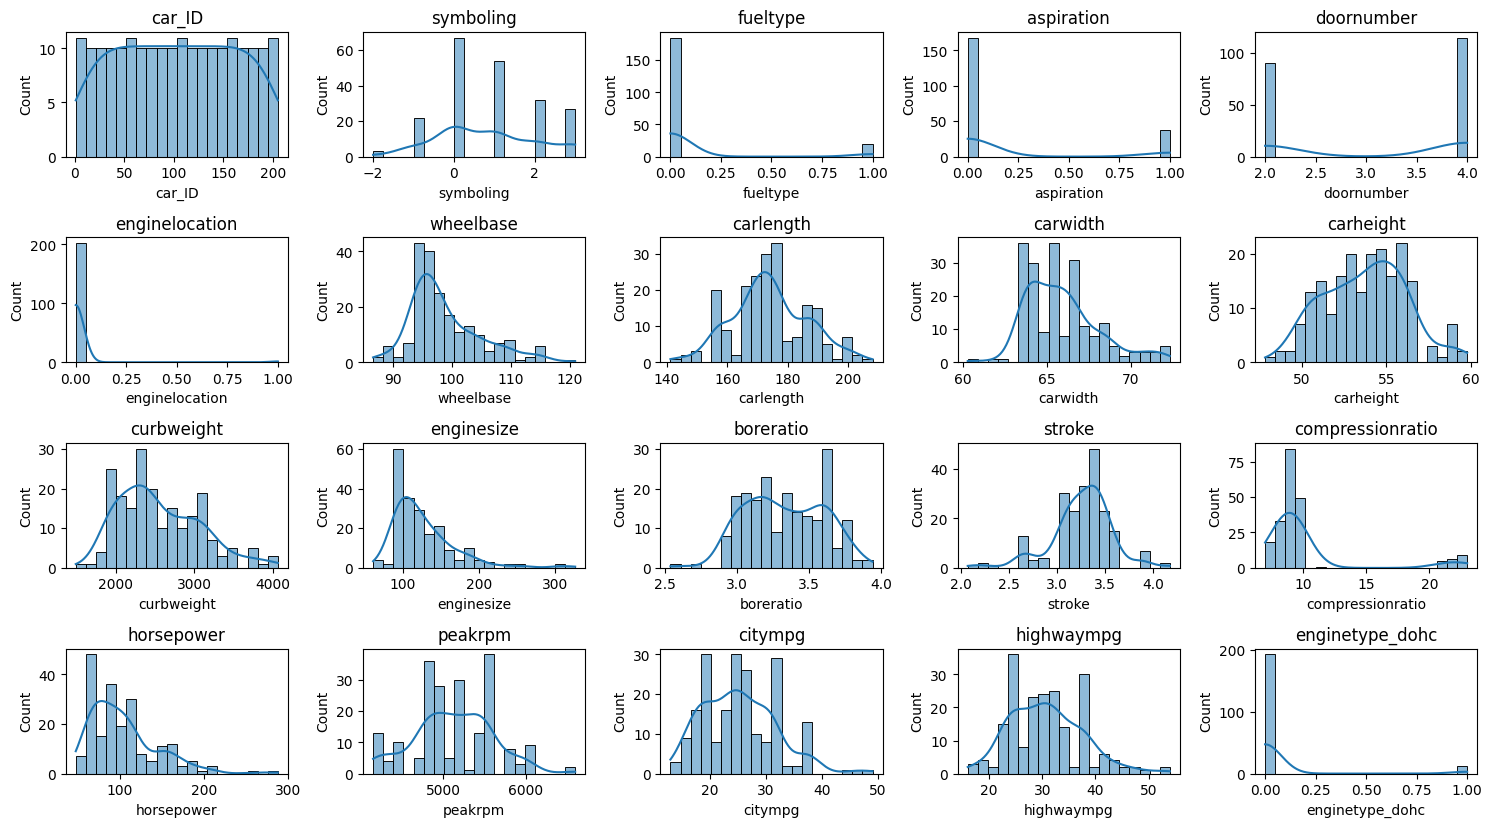

In [ ]:
#After completing the assignment, I was not satisfied with the result.
#I reviewed the data again and rechecked the columns that I had previously deleted because I thought they were unimportant. (fuelsystem,cylindernumber,drivewheel )
#Doing this increased the number of columns and so did the complexity because the ones I deleted were categorical variables.
# Then I ran linear regression and it got worse, so I deleted the fuel system and drivewheel again.
# I didn't want to delete the features that appeared to have no effect on feature importance because it might have an indirect effect.
# This is for feature importance:
X = df3.drop(columns=['price'])
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5
                                                  )
model = RandomForestRegressor(n_estimators=150, random_state=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

threshold = 0.001
#It get indexes and names of important features
feature_importances = model.feature_importances_
important_features_idx = np.where(feature_importances > threshold)[0]

important_features_names = X.columns[important_features_idx]

important_feature_importances = feature_importances[important_features_idx]

plt.figure(figsize=(12, 8))
sns.barplot(x=important_feature_importances, y=important_features_names)
plt.title('Feature Importance (Threshold > 0.001)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#The distribution of the first 20 features
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns[:20]):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
#Training data set
X = df3.drop(columns=['price'])
y = df3.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# 1) Linear Regression:
# It creates the linear regression
model = LinearRegression()

# It trains the model with data.
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# To evaluate the performance of the model, it makes y_prediction with x test data, and then compares it with the real value y_test and finds the difference.
y_pred = model.predict(X_test)

# Residual is the difference between the predicted values and the real observed values .
residuals = y_test - y_pred

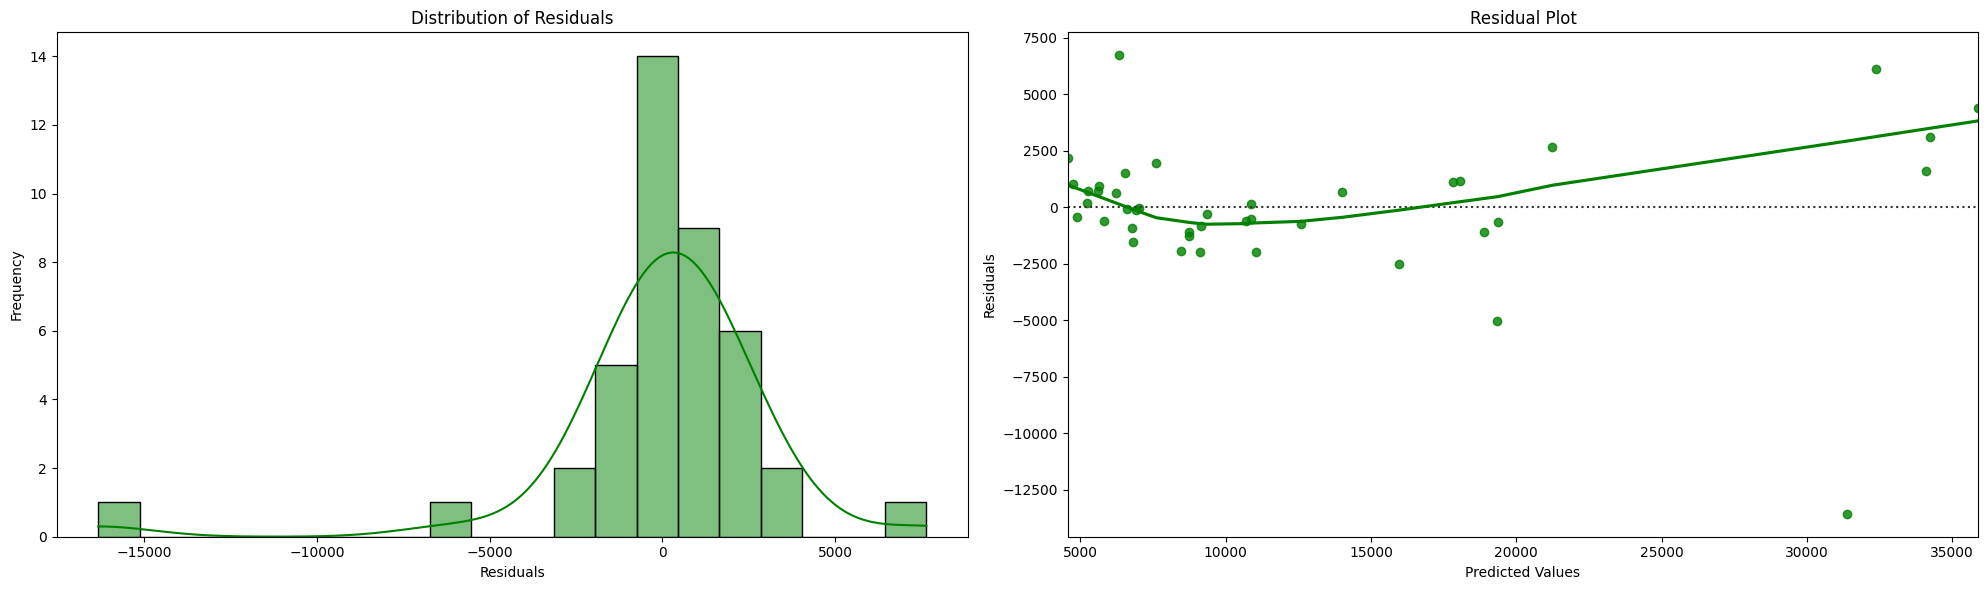

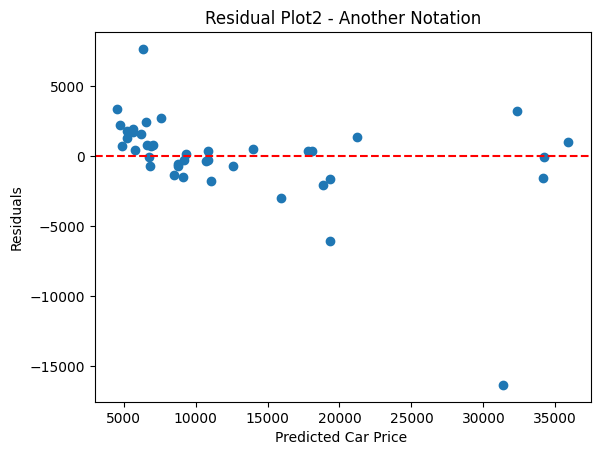

In [ ]:
#Here, it creates a shape with a width of 20 units and a height of 6 units.
plt.figure(figsize=(20, 6))

# Histogram -  1 row, 2 columns, 1st column is histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color="g", bins=20)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# 1 row, 2 columns, 2nd graph is line
plt.subplot(1, 2, 2)
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Predicted Values") #by model
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Car Price ')
plt.ylabel('Residuals')
plt.title('Residual Plot2 - Another Notation')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


R^2 Score (k-nn): 0.89873169470736
RMSE (k-nn): 2630.228648274834

R^2 Score (Linear Regression): 0.8399371143839727
RMSE (Linear Regression): 3306.7552650862253



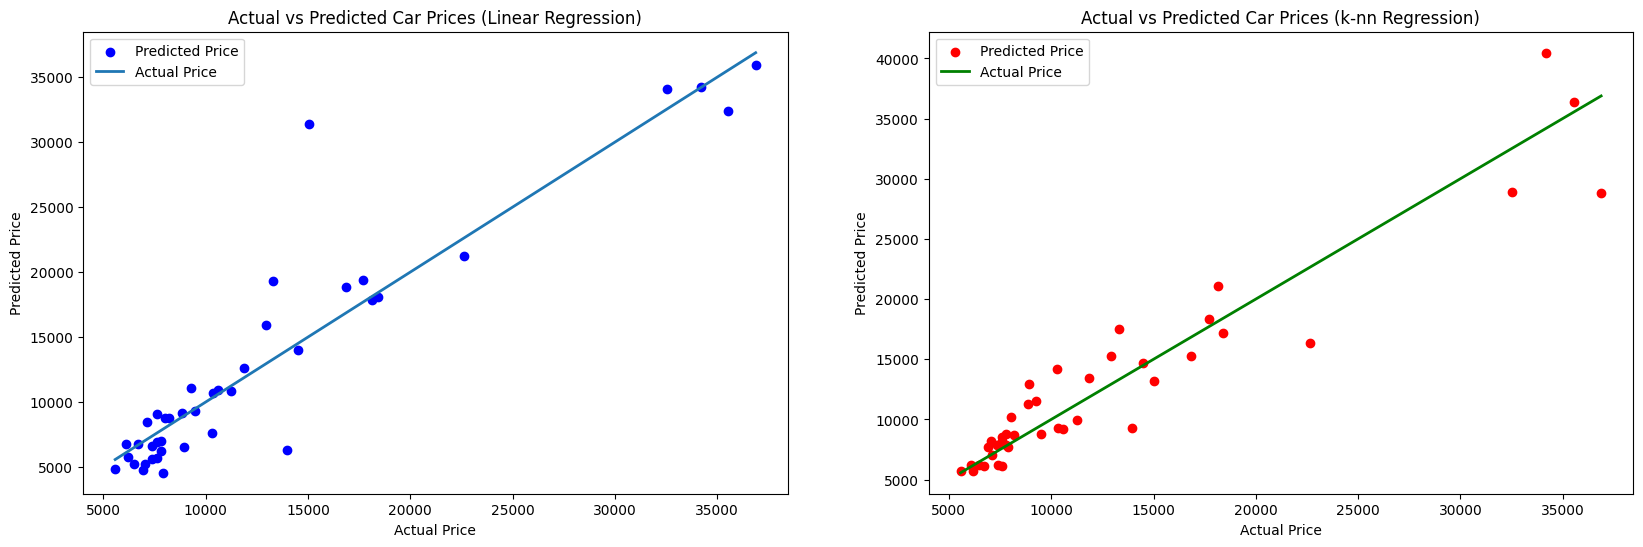

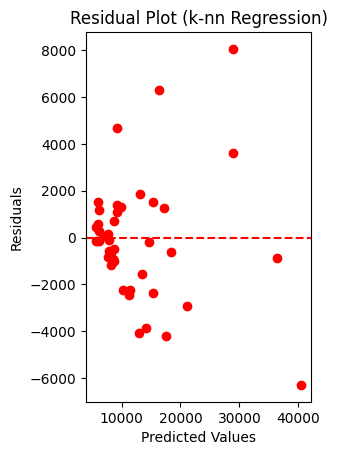

In [ ]:
# k-nn Regression
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)


r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print()
print(f"R^2 Score (k-nn): {r2_knn}")
print(f"RMSE (k-nn): {rmse_knn}")

r2_lin = r2_score(y_test, y_pred)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred))

print()
print(f"R^2 Score (Linear Regression): {r2_lin}")
print(f"RMSE (Linear Regression): {rmse_lin}")
print()


# I left k at 3 and now knn has better performance than linear regression. (you can see finding the best parameter below)
#There were fewer columns(in data) in my first code, when I added the columns that I thought might be necessary, the accuracy in the linear model decreased, so now knn works better.

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', label='Predicted Price')

#It shows the perfect regression
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  lw=2, label='Actual Price')
plt.title('Actual vs Predicted Car Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
#It adds the description to the top of the graph
plt.legend()

plt.subplot(1, 2, 2)
#If the dots are concentrated on the line, the model is performing well.
plt.scatter(y_test, y_pred_knn, color='red', label='Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  lw=2, label='Actual Price', color='green')
plt.title('Actual vs Predicted Car Prices (k-nn Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Residuals for k-nn Regression
residuals_knn = y_test - y_pred_knn
plt.subplot(1, 2, 2)
plt.scatter(y_pred_knn, residuals_knn, color='red')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (k-nn Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   fueltype                205 non-null    int64  
 3   aspiration              205 non-null    int64  
 4   doornumber              205 non-null    int64  
 5   enginelocation          205 non-null    int64  
 6   wheelbase               205 non-null    float64
 7   carlength               205 non-null    float64
 8   carwidth                205 non-null    float64
 9   carheight               205 non-null    float64
 10  curbweight              205 non-null    int64  
 11  enginesize              205 non-null    int64  
 12  boreratio               205 non-null    float64
 13  stroke                  205 non-null    float64
 14  compressionratio        205 non-null    fl

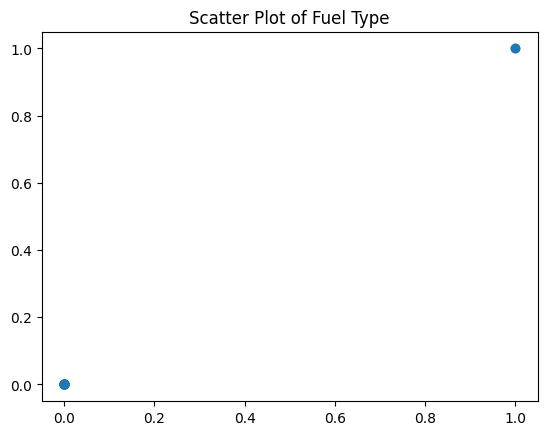

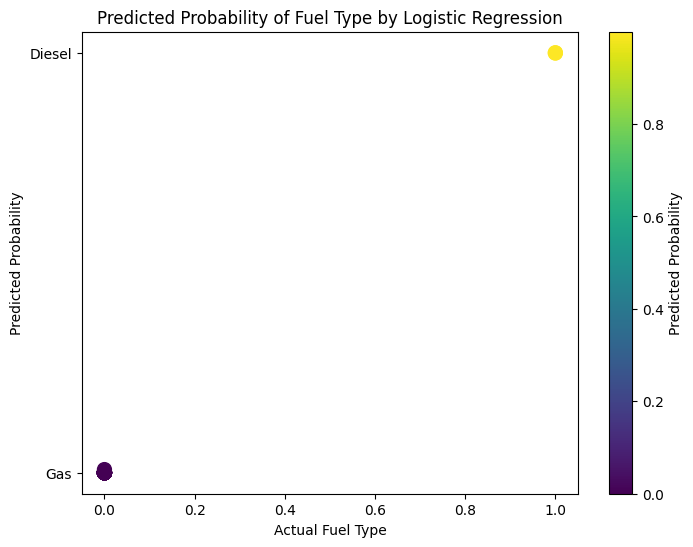


Threshold for Maximized Recall: 1.3336475924488103e-18
Threshold for Maximized F-1 Score: 0.9989474834343651


array([[39,  0],
       [ 0,  2]])

In [ ]:
#Logistic regression with fueltype prediction
df3.info()
# I chose the fuel type variable because it contains gas and diesel which means 0 and 1 , binary classification means it can solve with logistic regression

X = df3.drop(columns=['fueltype'])
y = df3.fueltype


diesel_count = df[df['fueltype'] == 1].shape[0]

print(f"Number of diesel cars: {diesel_count}")  # It is 20 so very few

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


model = LogisticRegression( max_iter=100000)
model.fit(X_train, y_train)



#Finding the probabilities of the model belonging to the "diesel" fuel type.
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)


# Finding the threshold value that maximizes the recall value, it calculates the precision and recall for different thresholds, and finds the threshold which has the max recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
threshold_recall = thresholds[np.argmax(recall)]

# Finding the threshold value that maximizes the F-1 Score
f1_scores = 2 * (precision * recall) / (precision + recall)
threshold_f1 = thresholds[np.argmax(f1_scores)]

plt.scatter(y_test,y_pred)
plt.title('Scatter Plot of Fuel Type')
plt.show()
plt.figure(figsize=(8, 6))
#The expression c=y_pred_prob determines the color of each point based on the y_pred_prob value, s means: edit and increase the dot size
# in the graph : not visible because they overlap
plt.scatter(y_test, y_pred_prob, c=y_pred_prob, cmap='viridis', s=100)
plt.title('Predicted Probability of Fuel Type by Logistic Regression')
plt.xlabel('Actual Fuel Type')
plt.ylabel('Predicted Probability')
plt.yticks([0, 1], ['Gas', 'Diesel'])
plt.colorbar(label='Predicted Probability')
plt.show()

print()
print(f"Threshold for Maximized Recall: {threshold_recall}")
print(f"Threshold for Maximized F-1 Score: {threshold_f1}")
confusion_matrix(y_test,y_pred)


In [ ]:
# Find the best hyperparameters with GridSearchCV FOR KNN:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

model = KNeighborsRegressor()
param_grid = {'n_neighbors': [3, 5, 7]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 3}


In [ ]:
# Find the best hyperparameters with GridSearchCV FOR DECISION TREE:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5}


In [ ]:
#Decision Tree
X = df3.drop(columns=['price'])
y = df3.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
X_train.shape


(164, 60)

In [ ]:
y_train.shape

(164,)

In [ ]:
# It creates the decision tree regression
# Parameters came from the grid search
# For each split I choose at least 15 sample, every 15 sample we can make a split
model = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=15, random_state=5)

In [ ]:
# It trains the model with data.
model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=15, min_samples_split=15, random_state=5)

In [ ]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9421232036179421

In [ ]:
y_pred

array([ 8276.36363636,  5877.71428571, 17739.        , 34126.67857143,
        6719.25      , 15847.81818182, 20155.520875  ,  7410.3       ,
        8276.36363636,  8276.36363636,  7439.5       ,  7410.3       ,
        7439.5       , 12170.        , 10097.61538462,  8276.36363636,
       12607.66666667, 34126.67857143,  5877.71428571,  7410.3       ,
        5877.71428571,  9177.85714286,  8840.3       , 17739.        ,
        9177.85714286, 14642.22222222,  8840.3       ,  8276.36363636,
       20487.5       ,  7410.3       ,  8276.36363636,  5877.71428571,
       20487.5       , 13067.5       ,  8276.36363636, 10097.61538462,
       14642.22222222, 34126.67857143, 34126.67857143,  5877.71428571,
       14642.22222222])

In [ ]:
y_test.iloc[2]

18420.0

In [ ]:
y_pred[2]

17739.0

In [ ]:
mse=mean_squared_error(y_test, y_pred)
rmse_decision_tree = np.sqrt(mse)
print(f"RMSE Decision Tree: {rmse_decision_tree}")

RMSE Decision Tree: 1988.4239003378723


In [ ]:
r2_decision_tree = r2_score(y_test, y_pred)
print(f"R^2 Score Decision Tree: {r2_decision_tree})")

R^2 Score Decision Tree: 0.9421232036179421)


In [ ]:
# So the summary of decision tree: rmse and r2 was better than the others but in cross validation(for entire set) results are different
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model_dec = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=15, random_state=5)
model_dec.fit(X_train, y_train)
y_pred = model_dec.predict(X_test)
y_pred
mse = mean_squared_error(y_test, y_pred)
rmse_decision_tree = np.sqrt(mse)
print(f"RMSE Decision Tree: {rmse_decision_tree}")

RMSE Decision Tree: 1988.4239003378723


In [ ]:
# cv is number of iteration for cross validation
#Cross validation with entire data set
from sklearn.model_selection import cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5
                                                  )
model_dec = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=15, random_state=5)
cross_mean = cross_val_score(model_dec, X, y, cv=10).mean()
y_pred = cross_val_predict(model_dec, X, y, cv=10)

mse = mean_squared_error(y, y_pred)
mse
rmse_decision_tree = np.sqrt(mse)
print(f"RMSE Decision Tree: {rmse_decision_tree}")

RMSE Decision Tree: 3538.6544031086955


In [ ]:
#Cross validation with training data set
from sklearn.model_selection import cross_val_score, cross_val_predict
X = df3.drop(columns=['price'])
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model_dec = DecisionTreeRegressor(criterion='squared_error', max_depth=15, min_samples_split=15, random_state=5)
cv_score = cross_val_score(model_dec, X_train, y_train, cv=5)
mean_score = cv_score.mean()
print("Cross-Validation Score:", mean_score)
y_pred = cross_val_predict(model_dec, X_train, y_train, cv=10)


mse = mean_squared_error(y_train, y_pred)
mse
rmse_decision_tree = np.sqrt(mse)
print(f"RMSE Decision Tree: {rmse_decision_tree}")


Cross-Validation Score: 0.874739995382441
RMSE Decision Tree: 2820.1623042333244


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81461942, 0.82486165, 0.94808221, 0.8859277 , 0.79128064])

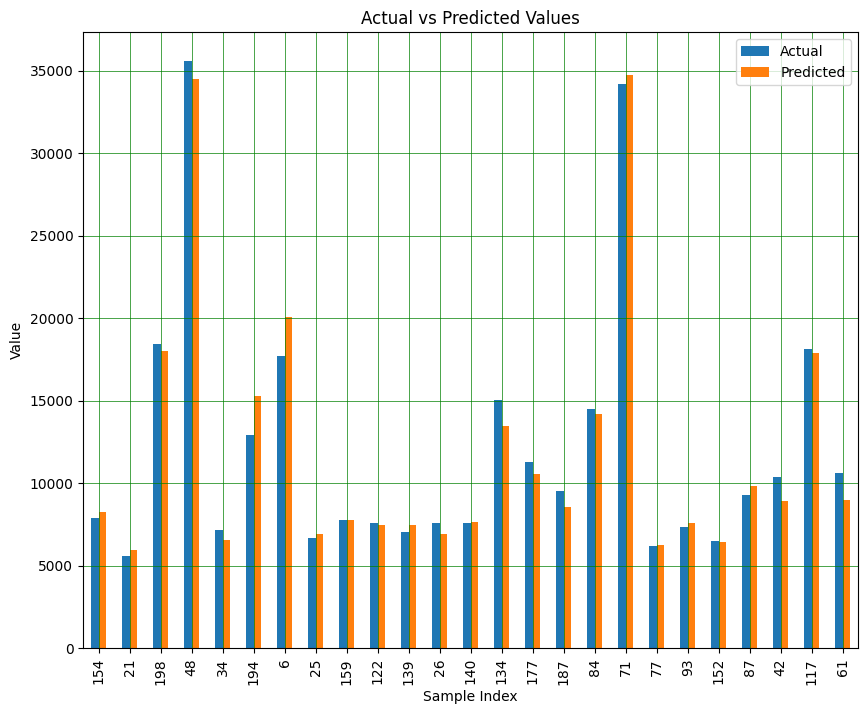


RMSE Random Forest: 1345.2819696147556
R^2 Score (random forest): 0.9735080956879744
Cross-Validation Scores: [ 0.8358846   0.86358835 -1.44407077  0.91203005  0.74051298]
Mean R^2 Score: 0.3815890417167301


In [ ]:
X = df3.drop(columns=['price'])
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5
                                                  )
model = RandomForestRegressor(n_estimators=150, random_state=5)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()

mse = mean_squared_error(y_test, y_pred)
rmse_random_forest = np.sqrt(mse)
print()
print(f"RMSE Random Forest: {rmse_random_forest}")

r2_random_forest = r2_score(y_test, y_pred)
print(f"R^2 Score (random forest): {r2_random_forest}")

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean R^2 Score:", cv_scores.mean())


In [ ]:
#So, the lowest RMSE value came from random forest, among all regressions.
# Also, the decision tree is good in terms of rmse and cross validation for training set compared to others
# but it is bad for cross validation with the entire data set

In [ ]:
# cv is number of iteration for cross validation
#Cross validation with entire data set for RANDOM FOREST
from sklearn.model_selection import cross_val_score, cross_val_predict
X = df3.drop(columns=['price'])
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5
                                                  )
model = RandomForestRegressor(n_estimators=150, random_state=5)
cross_mean = cross_val_score(model, X, y, cv=10).mean()
y_pred= cross_val_predict(model, X, y, cv=10)

mse = mean_squared_error(y, y_pred)
mse
rmse_decision_tree = np.sqrt(mse)

print(f"RMSE Random Forest: {rmse_decision_tree}")




RMSE Random Forest: 3167.480791822921


In [ ]:
# Find the best hyperparameters with GridSearchCV FOR RANDOM FOREST:
X = df3.drop(columns=['price'])
y = df3.price
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf_model = RandomForestRegressor(random_state=0)
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5)


grid_search_rf.fit(X_train, y_train)


print("Best Parameters:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)



Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9096370379045349


RMSE Random Forest: 1317.1438493180235
R^2 Score (random forest): 0.9746047231891318
Cross-Validation Scores: [ 0.82944969  0.86302139 -1.49556087  0.91555837  0.74561983]
Mean R^2 Score: 0.37161768141133733


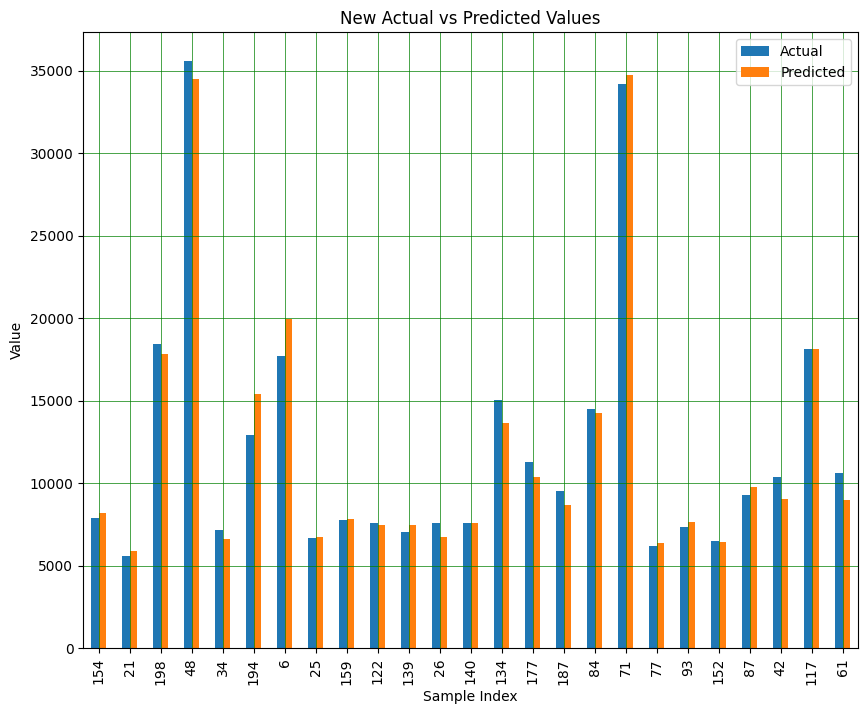

In [ ]:
# Random Forest with the best parameters:

#Finding the best parameters took a lot of time so :  previous best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
#Best Score: 0.9999981893004115
# Actually, finding the best parameters didnt change the overall too much, maybe its because random forest tend to be overfit when we use the best parameters

X = df3.drop(columns=['price'])
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
best_params_rf = grid_search_rf.best_params_
best_rf_model = RandomForestRegressor(n_estimators=300,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=0)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_random_forest = np.sqrt(mse)
print(f"RMSE Random Forest: {rmse_random_forest}")

r2_random_forest = r2_score(y_test, y_pred)
print(f"R^2 Score (random forest): {r2_random_forest}")

cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean R^2 Score:", cv_scores.mean())

import matplotlib.pyplot as plt

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# First 25 :
results.head(25).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('New Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.show()
